# Data Mining 7331 - Fall 2019
## Lab 2 - Classification

* **Allen Ansari**
* **Chad Madding**
* **Yongjun (Ian) Chu**

### Nbviewer link
https://nbviewer.jupyter.org/github/cmadding/MSDS7331/blob/master/Lab02/Lab2_Group1.ipynb

## Introduction
Cardiovascular diseases (CVD) are the no. 1 cause of death in US each year. To reduce the death rate, the best approach is by early detection and screening. In this Lab we will implement models including decision tree, Random Forest, KNN and Support Vector Machine (SVM) to predict the probability of a patient having CVD based on results from medical examinations, such as blood pressure values and glucose content.
In addition, we will also try to set up models to predict cholesterol level (normal or not) for each patient based on their medical exam results.

## Data description

We will be performing an analysis of the cardiovascular diseases dataset found on Kaggle (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset). It consists of 70,000 records of patient’s data in 12 features, such as age, gender, systolic blood pressure, diastolic blood pressure and CVD status(binary, 1 or 0).
There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

|Feature   |Variable Type   |Variable   |Value Type   |
|:---------|:--------------|:---------------|:------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

For any binary data type, "0" means "No" and "1" means "Yes". All of the dataset values were collected at the moment of medical examination.

## Table of Contents<a id="top"></a>

* **[Data Preparation Part 1](#Data_Preparation_Part_1)**
    *  Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.
* **[Data Preparation Part 2](#Data_Preparation_Part_2)**
    *  Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).
* **[Modeling and Evaluation 1](#Modeling_and_Evaluation_1)**
    *  Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.
* **[Modeling and Evaluation 2](#Modeling_and_Evaluation_2)**
    *  Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.
* **[Task 1](#Task_1)**
    * **[1.1 Modeling and Evaluation 3](#1.1_Modeling_and_Evaluation_3)**
         *  Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!
    * **[1.2 Modeling and Evaluation 4](#1.2_Modeling_and_Evaluation_4)**
         *  Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.
    * **[1.3 Modeling and Evaluation 5](#1.3_Modeling_and_Evaluation_5)**
         *  Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.
    * **[1.4 Modeling and Evaluation 6](#1.4_Modeling_and_Evaluation_6)**
         *  Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.
* **[Task 2](#Task_2)**    
    * **[2.1 Modeling and Evaluation 3](#2.1_Modeling_and_Evaluation_3)**
         *  Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!
    * **[2.2 Modeling and Evaluation 4](#2.2_Modeling_and_Evaluation_4)**
         *  Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.
    * **[2.3 Modeling and Evaluation 5](#2.3_Modeling_and_Evaluation_5)**
         *  Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.
    * **[2.4 Modeling and Evaluation 6](#2.4_Modeling_and_Evaluation_6)**
         *  Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.
* **[Deployment](#Deployment)**
    *  How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would you deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?
* **[Exceptional Work](#Exceptional_Work)**
    *  You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

<a href="#top">Back to Top</a>
### Data_Preparation_Part_1 <a id="Data_Preparation_Part_1"></a>
* We obtained this CVD dataset from Kaggle. The purpose of this dataset was to determine which medical aspects had the most bearing on whether a patient would have CVD or not and have normal or not normal cholesterol level. 

In [1]:
#Import data all necessary libraries we will be using in our estimation

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import sklearn
import statistics
import random

from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, RFE, SelectFromModel

from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from IPython.display import display, HTML

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit, StratifiedShuffleSplit

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

matplotlib.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

#Bring in data set
df = pd.read_csv('data/cardio_train.csv', sep= ';') #read in the csv file

# Show the dimension and the first 5 rows of the dataset
print(df.shape)
df.head()

(70000, 13)


C:\Users\04616598\.conda\envs\ML7331\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Our data preparation includes following steps:
* Remove the "id" attribute as it is not needed in this assignment
* Inspect each feature for NA values. If more than 75% of the feature contains NA, we replace that field with 0. If less than 75% is NA, then the median value of the column is used to replace the NA
* Check for any categorical variables and using proper methods (like one-hot) to convert them to numerical variables
* Remove all duplicate entries in the dataset
* Search each feature for any outliers and remove them from dataset. We will keep the entries between 97.5% quantile and 2.5% quantile for those features which have outliers or incorrect data 
* Add new variable call Body mass index (BMI) which is commonly used in medical field

In [2]:
# drop 'id' column 
if 'id' in df:
    del df['id']

In [3]:
# Total missing values for each feature
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

We want to see the data type of each column of the CVD dataset and see if there are any categorical variables in the dataset. 

In [4]:
# are there any NA values in the dataset
if df.isnull().values.any():
    print('There are NAs or missing values in the datasets.')
else:
    print('There are no missing values or NAs in the dataset.')        

There are no missing values or NAs in the dataset.


In [5]:
# Are there any non-numbers in each column?
for column in df:
    print(column)
    cnt=0
    for row in df[column]:
        try:
            float(row)
        except ValueError:
            print("there is a non-numeric value: " + row)
            pass
        cnt+=1
        
print(cnt)

age
gender
height
weight
ap_hi
ap_lo
cholesterol
gluc
smoke
alco
active
cardio
70000


All values in the dataset are numeric.

In [6]:
#Are there any duplicate entries in the dataset?
duplicateRowsDF = df[df.duplicated(keep='first')]

print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

print(f"\nThere are {len(duplicateRowsDF)} duplicated entries in the dataset!")


Duplicate Rows except first occurrence based on all columns are :
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10562  20495       1     165    70.0    120     80            1     1      0   
21784  16793       1     165    68.0    120     80            1     1      0   
38505  18988       1     164    65.0    120     80            1     1      0   
40365  14552       1     158    64.0    120     80            1     1      0   
42450  18353       1     169    67.0    120     80            1     1      0   
44653  16937       2     170    70.0    120     80            1     1      0   
45125  21280       1     165    65.0    120     80            1     1      0   
45748  22077       1     175    69.0    120     80            1     1      0   
45810  21230       1     164    62.0    120     80            1     1      0   
48917  21945       1     165    60.0    120     80            1     1      0   
50432  17493       2     169    74.0    120     80    

For duplicated entries, we think they were just from mistakes by entering more than once. These 24 entries should be removed.

In [7]:
#remove duplicates in the dataframe
df.drop_duplicates(keep = 'first', inplace = True) 
df.shape

(69976, 12)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


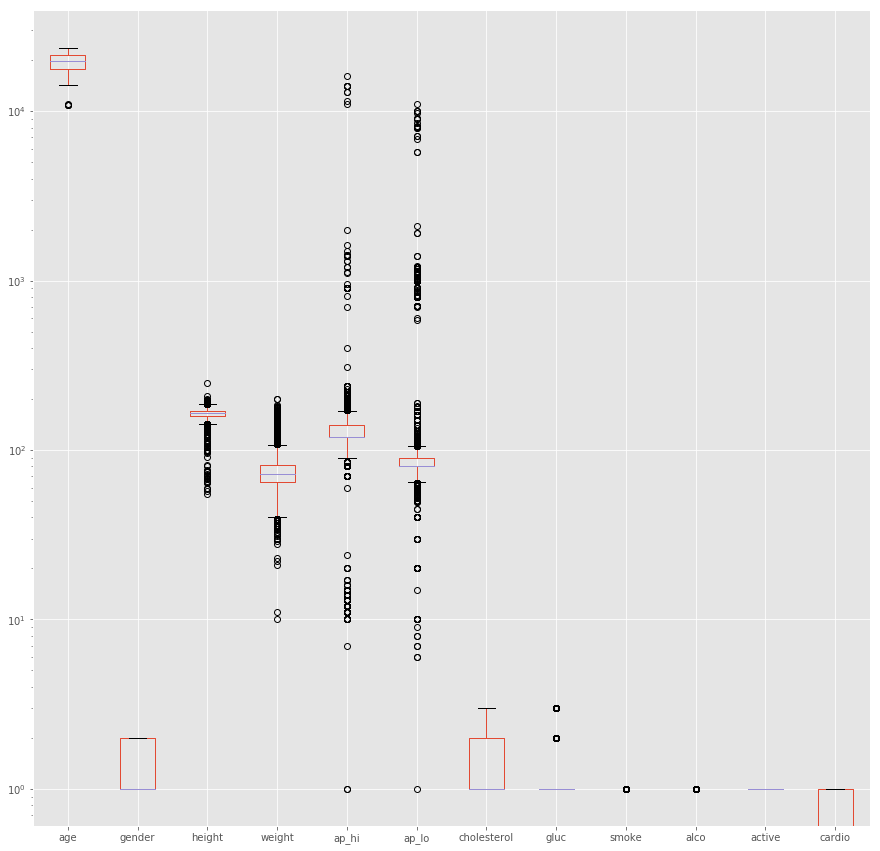

In [8]:
#are there any outliers in the dataset?

#boxplot of all the variables
plt.figure(figsize=(15, 15))
ax = df.boxplot()
ax.set_yscale('log')

df.describe()

From the simple statistical information and the boxplots above, we can easily see that there are some incorrect data points there. For example, the blood pressure has negative readings and the maximum readings for both Systolic blood pressure (ap_hi) and Diastolic blood pressure (ap_lo) are over 10,000, which are obviously mistakes. 

In [9]:
#to only keep the entries between 97.5% quantile and 2.5% quantile for ap_hi and ap_lo
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)
df.shape

(66169, 12)

We also notice that there are some abnormal values in column "weight" and "height". The minimum weight is 10 kg and maximum 200 kg. and the minimum height is 55 cm and maximum is 250 cm. Obviously these values are outliers as they don't represent the values for normal people. So, we decided to remove these by only keeping the values from 2.5 to 97.5 percentile range. 

In [10]:
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)

From above statistics table we realized that age measured in days, for better description we decided to convert age variable to be in years.

In [11]:
df['years'] = (df['age'] / 365).round().astype('int')
if 'age' in df:
    del df['age']

In [12]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,52
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,48


Body mass index (BMI) is commonly used in medical field. It is a key index for relating weight to height. BMI is a person's weight in kilograms (kg) divided by his or her height in meters squared.

In [13]:
#define BMI
df['BMI'] = df['weight']/((df['height']/100)**2)
# converting BMI range to categorical as 1 = underweight,2 = normal, 3 = overweight and 4 = obese
df['BMI'] = df['BMI'].apply(lambda x: 1 if x<18.5 else(2 if x>=18.5 and x<25 else( 3 if x >= 25 and x < 30 else 4)))

in CDV dataset gender shown as 1 for female and 2 for men. Since this is a binary feature showing these 2 categories as 1 and 2 does not make sense, so we are change the gender levels to be 0 for female and 1 for male.

In [14]:
#change gender levels: 1 to 0 (female) and 2 to 1 (male)
df['gender'] = df['gender'].apply(lambda x:0 if x == 1 else(1))

<a href="#top">Back to Top</a>
### Data Preparation Part 2<a id="Data_Preparation_Part_2"></a>
* Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

Our final dataset includes 13 features and 60728 entries. 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60728 entries, 0 to 69999
Data columns (total 13 columns):
gender         60728 non-null int64
height         60728 non-null int64
weight         60728 non-null float64
ap_hi          60728 non-null int64
ap_lo          60728 non-null int64
cholesterol    60728 non-null int64
gluc           60728 non-null int64
smoke          60728 non-null int64
alco           60728 non-null int64
active         60728 non-null int64
cardio         60728 non-null int64
years          60728 non-null int32
BMI            60728 non-null int64
dtypes: float64(1), int32(1), int64(11)
memory usage: 6.3 MB


|Feature   |Variable Type   |Variable   |Value Type   |
|:---------|:--------------|:---------------|:------------|
| Years | Objective Feature | years | int (years) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | binary |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Body Mass Index | Examination Feature | bmi | int |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


<a href="#top">Back to Top</a>
### Modeling and Evaluation 1<a id="Modeling_and_Evaluation_1"></a>

The purpose of this LAB was to determine which medical aspects had the most bearing on whether a patient would had CVD or not and also to classified cholesterol level each patient into normal and high cholesterol level.

A receiver operating characteristic curve, ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied which is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
A ROC curve can be used to select a threshold for a classifier which maximizes the true positives, while minimizing the false positives.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random. Most classifiers have AUCs that fall somewhere between these two values. Therefore, the overall model performances can be compared by considering the AUC.

In addition to ROC-AUC metric, we use the other classification metrics in our models too. 

1- Accuracy: Is the proportion of the total number of predictions that were correct over all kinds predictions made. Accuracy is a good measure when the target variable classes in the data are nearly balanced.

Accuracy = (TP + TN)/(TP + FP + FN + TN)

2- Precision: Which is also called Positive Predictive Value and is the proportion of positive cases that were correctly identified.

Precision = (TP) / (TP + FP)

3- Recall or Sensitivity: Is the proportion of actual positive cases which are correctly identified.

Recall = (TP) / (TP + FN)

Recall gives us information about a model performance with respect to false negatives (how many did we miss), while precision gives us information about its performance with respect to false positives (how many did we caught).

So basically, if we want to focus more on minimizing False Negatives, we would want our Recall to be as close to 100% as possible without precision being too bad and if we want to minimize False positives, then our focus should be to make Precision as close to 100% as possible.


<a href="#top">Back to Top</a>
### Modeling and Evaluation 2<a id="Modeling_and_Evaluation_2"></a>

Before carrying out the modeling, we have to decide which method we are going to choose for the cross validation. 

In [16]:
#cardio percentage split
(df['cardio'].value_counts()/len(df))*100

0    50.801937
1    49.198063
Name: cardio, dtype: float64

In [17]:
#cholesterol percentage split
(df['cholesterol'].value_counts()/len(df))*100

1    75.754183
2    13.091161
3    11.154657
Name: cholesterol, dtype: float64

For data training, a Stratified k-fold cross validation technique are used which works to balance the ratio of labels used in each fold. Our dependent variable (cardio) has approximately a 49-51% split (see above), and with a large enough data set we can have a high level of confidence of a random split in the data with using Stratified techniques. In this technique dataset will split into 10 equal sections, train on nine of the sections and score against the last section. This method will cycle through 10 times so that the each of the 10 sections is used as a holdout sample. We chose to shuffle the data during the cross validation to provide a higher confidence there was no grouping of schools that we did not notice.

In other hand for Cholesterol there is imbalanced distribution between classes (see above). The major class is patients with normal cholesterol level(75.7%) followed by above normal (13%) and well above normal (11%). Since the important thing is that to know if patient has normal cholesterol level or not we decided to combine both above normal classes (2 and 3) and use synthetic minority oversampling technique (SMOTE) which takes a subset of data from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

We chose a K fold (10 folds) validation algorithm, however a Shuffle Split may have performed just as well with this size data set. Where Shuffle Split is capable of creating n folds and fitting the data using n-1 to train and 1 to test against, there is a chance the same data will appear in the test set each time the data is sampled. We chose K fold to insure each value is used in the training set.

With the 10-fold cross validation we will be using a grid search technique, which will test a number of different parameters to determine the best final model. Different classification algorithms will have different parameters that can be set, so these will be tested with the grid search method.

Since CVD dataset does not have so many features (only 12) dimensionality reduction techniques are not used.

Our basic pipeline includes observation scaling and model classification steps. Observation scaling is a common step for all models. For this step the 'standardscaler' is used, which will scale our variables. This improves our prediction outcomes and makes later feature interpretation significantly easier, since all coefficients will be on the same scale.

The same random seed of 101 is used for all models that take a random state seed to eliminate the variability of getting different results between running our models so that we are able to hold which model is going to be the best model, for later interpretation.

<a href="#top">Back to Top</a>
## Task 1<a id="Task_1"></a>

### 1.1 Modeling and Evaluation 3<a id="1.1_Modeling_and_Evaluation_3"></a>

For cardio prediction we tried 4 different algorithms to create a model which has superior prediction capabilities based on the ROC/AUC scoring parameter:

* Support Vector Machine (SVM)
* K-Nearest Neighbor
* Random Forest Classification
* Decision Tree Classifier

A ROC/AUC plot will be created for each model and summarized our findings based on the combined results for these different models.

To perform a cross validation using the best parameters for the model which it is passed we use below code that borrowed form  Dr. Jake Drew's 2017HighlySegregatedHighSchoolCampuses Jupyter Notebook provided to the class.

In [60]:
from sklearn.model_selection import cross_validate
def EvaluateClassifierEstimator(classifierEstimator, X, Y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X, Y, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Rreavg = scores['test_recall'].mean()
    
    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average Recall for all cv folds is: \t\t\t {Rreavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Rreavg=Rreavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    print(scoresResults)
    return scoresResults

def EvaluateClassifierEstimator2(classifierEstimator, X, Y, cv):
    
    #Perform cross validation 
    from sklearn.model_selection import cross_val_predict
    predictions = cross_val_predict(classifierEstimator, X, Y, cv=cv)
    
    #model evaluation 
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    #pass true test set values and predictions to classification_report
    classReport = classification_report(Y,predictions)
    confMat = confusion_matrix(Y,predictions)
    acc = accuracy_score(Y,predictions)
    
    print(classReport)
    print(confMat)
    print(acc)
    
def EvaluateClassifierEstimator3(classifierEstimator, X, Y, cv):
    from sklearn import metrics as mt
    for fold, (train_index, test_index) in enumerate(cv.split(X,Y)):
        X_train = X[train_index]    
        y_train = Y[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
        X_test = X[test_index]
        y_test = Y[test_index]  # See comment on ravel and  y_train
        sm = SMOTE(random_state=101)
        X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
        classifierEstimator.fit(X_train, y_train) 
        y_pred = classifierEstimator.predict(X_test)
        acc = mt.accuracy_score(y_test,y_pred)
        conf = mt.confusion_matrix(y_test,y_pred)
        print("====Iteration",fold," ====")
        print("accuracy", acc )
        print("confusion matrix\n",conf)

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=101)
#separating input data into two parts X (features) and Y (target)
features = ["gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "years", "BMI"]

X2 = df[features].copy()

scaler = StandardScaler()
scaler.fit(X2)

#This makes our model's coefficients take on the same scale for accurate feature importance analysis
#Notice we scaled the data before the cross validation
X = scaler.transform(X2)

Y= df[['cardio']].copy()
Y.shape

(60728, 1)

### Model #1 : Support Vector Machine (SVM)

In [20]:
#SVM_SGD 10-fold cross-validation 

param_grid = { 'loss': ['modified_huber']
              ,'penalty':['l2']
              ,'alpha': [0.01, 0.1, 1, 10]
              ,'class_weight': ['balanced', None]
              ,'random_state': [101]
              ,'max_iter':[1000,1500]
              
             }
clf_SVM = SGDClassifier()
#Create a grid search object using the above parameters 
from sklearn.model_selection import GridSearchCV
SVMGridSearch = GridSearchCV(clf_SVM, param_grid=param_grid, cv=cv,n_jobs=8, verbose=1, scoring='roc_auc' )

#Perform hyperparameter search to find the best combination of parameters for our data
SVMGridSearch.fit(X,y=Y.values.ravel())
y_SVM_score = SVMGridSearch.predict(X)

y_SVM_prob=SVMGridSearch.predict_proba(X)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 160 out of 160 | elapsed:  7.6min finished


In [21]:
classifierEstimaterSVM =SVMGridSearch.best_estimator_
classifierEstimaterSVM

SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=1500,
       n_iter=None, n_jobs=1, penalty='l2', power_t=0.5, random_state=101,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [22]:
SVM_scores = EvaluateClassifierEstimator(classifierEstimaterSVM,X,Y,cv)

The average accuracy for all cv folds is: 			 0.72122
The average precision for all cv folds is: 			 0.75307
The average Recall for all cv folds is: 			 0.64484
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0  0.724234   0.758160  0.645248
1  0.728306   0.763179  0.649264
2  0.713651   0.742902  0.639224
3  0.717109   0.746698  0.643240
4  0.726000   0.760220  0.647256
5  0.722872   0.755782  0.645248
6  0.713980   0.739931  0.645582
7  0.720520   0.752150  0.644125
8  0.723485   0.754079  0.649816
9  0.722003   0.757636  0.639438


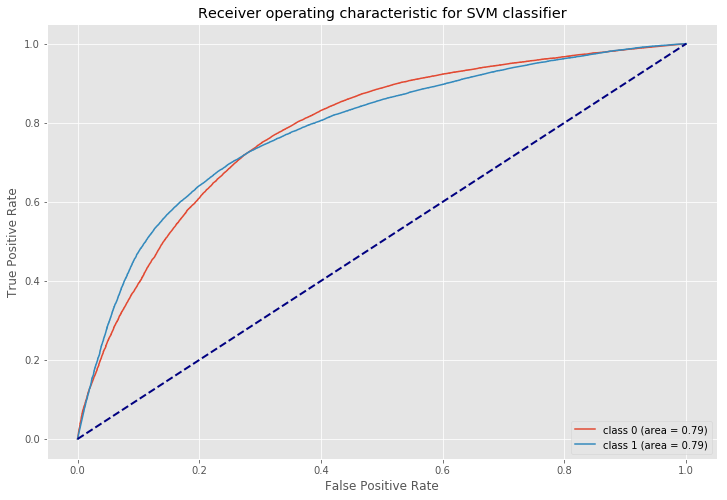

In [23]:
from sklearn.metrics import roc_curve, auc
fprSVM = dict()
tprSVM = dict()
roc_auc_SVM = dict()
for i in np.unique(Y):
    fprSVM[i], tprSVM[i], _ = mt.roc_curve(Y, y_SVM_prob[:,i], pos_label=i)
    roc_auc_SVM[i] = mt.auc(fprSVM[i], tprSVM[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Y):
    plt.plot(fprSVM[i], tprSVM[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_SVM[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for SVM classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [24]:
EvaluateClassifierEstimator2(classifierEstimaterSVM, X, Y, cv)

             precision    recall  f1-score   support

          0       0.70      0.80      0.74     30851
          1       0.75      0.64      0.69     29877

avg / total       0.73      0.72      0.72     60728

[[24532  6319]
 [10611 19266]]
0.7212159135818733


### Model #2 KNN Classification Parameter Optimization with GridSearch

K-Nearest Neighbor (KNN) classification is a valid option for this dataset since the dataset has been preprocessed and it has no missing values.  Parameter selections are critical to the performance of KNN classifiers; therefore, substantial time and effort was put forth to fully investigate the optimal parameters. 

##### Parameter Analysis:

*Algorithms:*  Algorithm used to compute the nearest neighbors can be ‘auto’matically determine the most appropriate algorithm to use for the given dataset/parameters, so it was left as default in our GridSearch.

##### GridSearch Parameters:

*n_neighbors:* Number of neighbors to use in the analysis. Preliminary analyses were conducted to find a desired range for number of neighbors. From these analyses, it was determined that the optimal number of neighbors is below 17. Above 17, the accuracy plateaus and start to decrease.

*Leaf_size:* The leaf size was adjusted, using: 10, 30, and 100 as the parameters. While there is an over-head penalty with using smaller leaves, accuracy may increase, so we will use it in our Grid Search.

*Metric:* How distance is measured between datapoints can be adjusted. The 2 options chosen were ‘minkowski’ and ‘euclidean’.

*Weights:* Both uniform and distance were looked at. ‘Uniform’ weight-all neighboring points get equal weight. ‘Distance’ weights points by the inverse of their distance.

*Predictor Variables:*  
Many of the predictor variable have different scaling, so to ensure all variables were treated equally in the analysis, all predictor variables are scaled to have a mean of 0 and Standard deviation of 1.

In [25]:
param_grid = [
    {
         'weights': ['uniform','distance'],
         'leaf_size': [10,30],
         'metric': ['minkowski','euclidean'],
         'n_neighbors':[13,15,17],
         
    }
]
clf_KNN = KNeighborsClassifier()
grid_search_KNN = GridSearchCV(clf_KNN, param_grid=param_grid,cv=cv,n_jobs=-1, verbose=1, scoring='roc_auc' )

KNearest_model = grid_search_KNN.fit(X, Y.values.ravel())
y_KNN_score = grid_search_KNN.predict(X)

y_KNN_prob=grid_search_KNN.predict_proba(X)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 33.1min finished


In [26]:
classifierEstimaterKNN = KNearest_model.best_estimator_
classifierEstimaterKNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

The GridSearch algorithm determined the following optimal parameters for K-Neighbors model.

* Leaf-Size: 30  
* Number of Neighbors: 17

* Distance Matric: Minkowski  
* Weights: Uniform

In [27]:
KNearest_scores = EvaluateClassifierEstimator(classifierEstimaterKNN,X,Y,cv=cv)

The average accuracy for all cv folds is: 			 0.71608
The average precision for all cv folds is: 			 0.72902
The average Recall for all cv folds is: 			 0.67313
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0  0.719460   0.732104  0.677711
1  0.725836   0.738722  0.685074
2  0.716944   0.734566  0.664993
3  0.715462   0.727766  0.673695
4  0.715462   0.730432  0.668340
5  0.709863   0.725533  0.659973
6  0.709699   0.718985  0.673025
7  0.713274   0.724585  0.672916
8  0.720520   0.730029  0.685303
9  0.714262   0.727471  0.670238


In [28]:
EvaluateClassifierEstimator2(classifierEstimaterKNN, X, Y, cv)

             precision    recall  f1-score   support

          0       0.71      0.76      0.73     30851
          1       0.73      0.67      0.70     29877

avg / total       0.72      0.72      0.72     60728

[[23375  7476]
 [ 9766 20111]]
0.7160782505598735


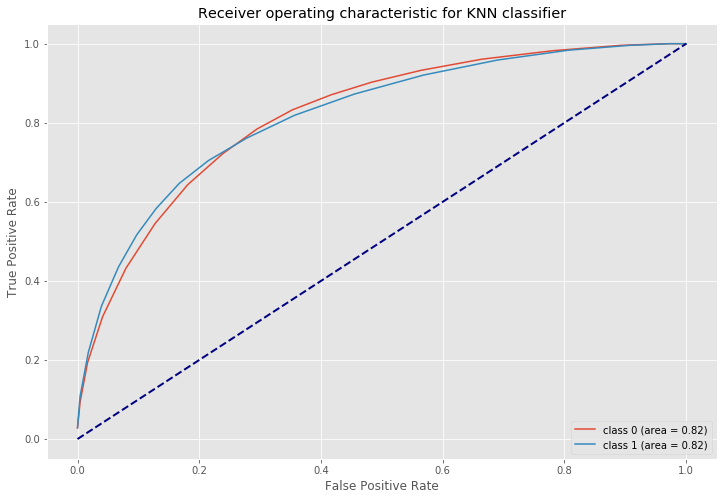

In [29]:
fprKNN = dict()
tprKNN = dict()
roc_auc_KNN = dict()
for i in np.unique(Y):
    fprKNN[i], tprKNN[i], _ = mt.roc_curve(Y, y_KNN_prob[:, i], pos_label=i)
    roc_auc_KNN[i] = mt.auc(fprKNN[i], tprKNN[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Y):
    plt.plot(fprKNN[i], tprKNN[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_KNN[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for KNN classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Model #3 Random Forest

One of the most commonly used classifier techniques is random forest, due to its very low bias and general stability when it comes to classification. One method of optimizing a random forest model is to try different parameters to increase performance. Another method of doing so is by utilizing grid search to let random forest decide which combination of hyperparameters would be best implemented in your model. We chose this route as it saves both time and sanity when comparing so many different parameters.

We'll start with a baseline random forest for our starting position.

In [30]:
param_grid = [
    {
         'n_estimators': [200, 500], 
         'max_depth': [5,10,15],
         'random_state':[101]
     }
]

clf_RF = RandomForestClassifier()
grid_search_RF = GridSearchCV(clf_RF, param_grid=param_grid, cv=cv,n_jobs=-1, verbose=1, scoring='roc_auc' )

RandomForest_model = grid_search_RF.fit(X, Y.values.ravel())

y_RF_score = grid_search_RF.predict(X)
y_RF_prob=grid_search_RF.predict_proba(X)


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.1min finished


In [31]:
classifierEstimaterRF = RandomForest_model.best_estimator_
classifierEstimaterRF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [32]:
Random_Forest_scores = EvaluateClassifierEstimator(classifierEstimaterRF,X,Y,cv=cv)

The average accuracy for all cv folds is: 			 0.72917
The average precision for all cv folds is: 			 0.75732
The average Recall for all cv folds is: 			 0.66155
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0  0.733289   0.763482  0.663320
1  0.736703   0.769709  0.663320
2  0.722048   0.750385  0.651941
3  0.728470   0.755242  0.662985
4  0.731434   0.760061  0.663655
5  0.730117   0.761535  0.657296
6  0.721225   0.746667  0.655957
7  0.728426   0.754566  0.663877
8  0.731225   0.753082  0.674925
9  0.728755   0.758488  0.658185


In [33]:
EvaluateClassifierEstimator2(classifierEstimaterRF, X, Y, cv)

             precision    recall  f1-score   support

          0       0.71      0.79      0.75     30851
          1       0.76      0.66      0.71     29877

avg / total       0.73      0.73      0.73     60728

[[24516  6335]
 [10112 19765]]
0.7291694111447767


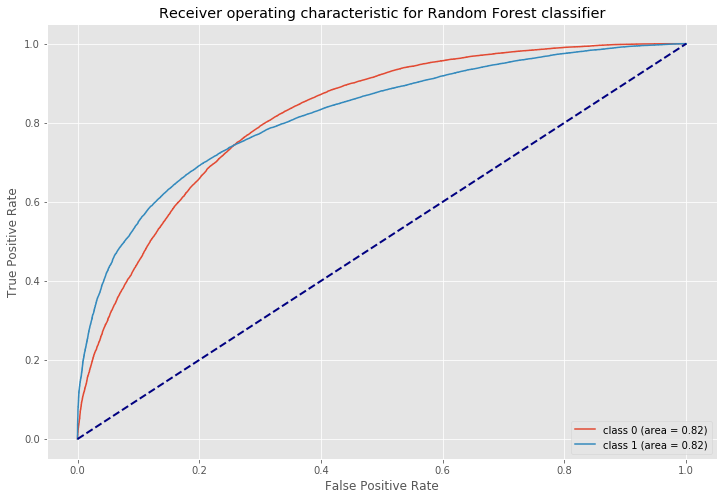

In [34]:
# create ROC cuve for Random Forest model:
fprRF = dict()
tprRF = dict()
roc_auc_RF = dict()
for i in np.unique(Y):
    fprRF[i], tprRF[i], _ = mt.roc_curve(Y, y_RF_prob[:, i], pos_label=i)
    roc_auc_RF[i] = mt.auc(fprRF[i], tprRF[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Y):
    plt.plot(fprRF[i], tprRF[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_RF[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for Random Forest classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Model #4 Decision Tree Classifier

In [35]:
param_grid = [
    {
         'max_depth': [5,10],
         'random_state':[101] 
     }
]

clf_DT = DecisionTreeClassifier()


grid_searchDT = GridSearchCV(clf_DT, param_grid=param_grid, cv=cv,n_jobs=-1, verbose=1, scoring='roc_auc')


# # Here we are training the model, this is 
# # what takes the most amount of time to run
DT_model = grid_searchDT.fit(X, Y.values.ravel())

y_DT_score = grid_searchDT.predict(X)
y_DT_prob = grid_searchDT.predict_proba(X)



Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.8s finished


In [36]:
classifierEstimaterDT = DT_model.best_estimator_
classifierEstimaterDT

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [37]:
DT_scores = EvaluateClassifierEstimator(classifierEstimaterDT,X,Y,cv=10)

The average accuracy for all cv folds is: 			 0.72444
The average precision for all cv folds is: 			 0.76704
The average Recall for all cv folds is: 			 0.63333
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0  0.724564   0.750858  0.658635
1  0.725342   0.750000  0.662651
2  0.727812   0.782480  0.618809
3  0.732093   0.791935  0.617805
4  0.716944   0.773374  0.600736
5  0.722872   0.744108  0.665663
6  0.722872   0.777070  0.612450
7  0.726449   0.780220  0.618011
8  0.726120   0.779325  0.618346
9  0.719368   0.741075  0.660194


In [38]:
EvaluateClassifierEstimator2(classifierEstimaterDT, X, Y, cv)

             precision    recall  f1-score   support

          0       0.70      0.81      0.75     30851
          1       0.76      0.64      0.70     29877

avg / total       0.73      0.72      0.72     60728

[[24898  5953]
 [10792 19085]]
0.7242622842840205


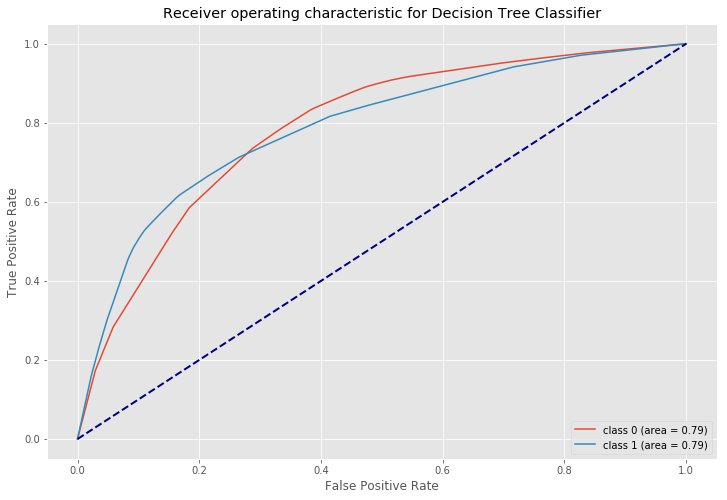

In [39]:
# create ROC curve for  Decision Tree Classifier:
fprDT = dict()
tprDT = dict()
roc_auc_DT = dict()
for i in np.unique(Y):
    fprDT[i], tprDT[i], _ = mt.roc_curve(Y, y_DT_prob[:, i], pos_label=i)
    roc_auc_DT[i] = mt.auc(fprDT[i], tprDT[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Y):
    plt.plot(fprDT[i], tprDT[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_DT[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for Decision Tree Classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<a href="#top">Back to Top</a>
### 1.2 Modeling and Evaluation 4<a id="1.2_Modeling_and_Evaluation_4"></a>

Here is the summary of the performance of 4 tested models:

|Model   |AUC   |Accuracy(%)   |
|:---------|:--------------|:---------------|
| SVM | 0.78 | 72.0 |
| KNN | 0.82 | 71.6 |
| Random Forest | 0.82 | 72.9 |
| Decision Tree | 0.79 | 72.4 |

AUC for both KNN and Random Forest classifier is the same.The best model we found was Random Forest Classification, with a  an accuracy of 72.9%, both highest among 4 models tested. On the other hand, the computation time taken by each model was comparable between each other. This leads to the conclusion that the Random Forest Classification pipeline could be used to accurately predict the cardio disease outcome. To make this clearer, we also plotted all 4 ROC curves within one graph (see below). The shape of each ROC curve is quite similar to each other, represented by curves that bow up to the top left of the plot, suggesting all models have good skills at predicting the outcome. With Random Forest having the largest area under the curve, it means that Random Forest model is the most skillful model among 4 tested for the kind of dataset we have.  

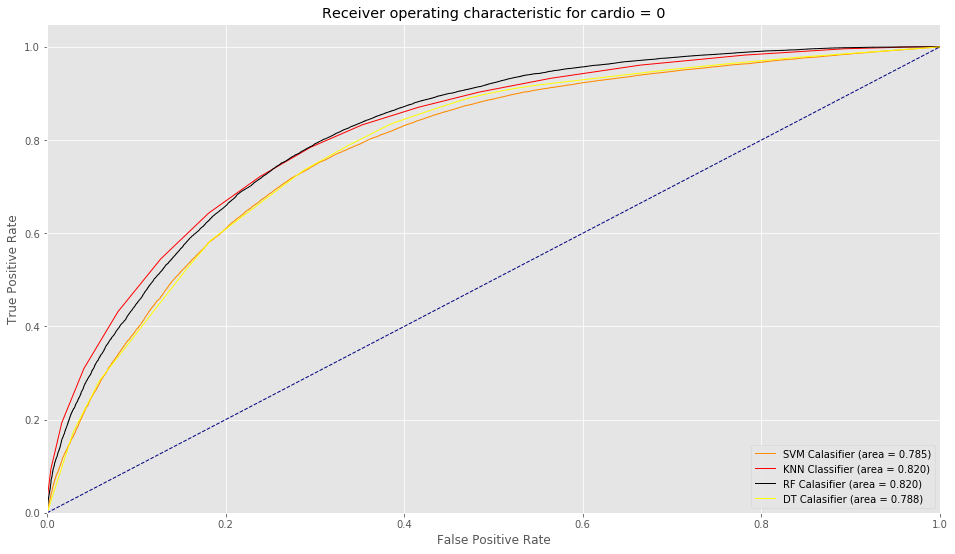

In [40]:
plt.figure(figsize=(16,9));
plt.plot(fprSVM[0], tprSVM[0], color='darkorange', lw=1, label='SVM Calasifier (area = %0.3f)' % roc_auc_SVM[0])
plt.plot(fprKNN[0], tprKNN[0], color='red', lw=1, label='KNN Classifier (area = %0.3f)' % roc_auc_KNN[0])
plt.plot(fprRF[0], tprRF[0], color='black', lw=1, label='RF Calasifier (area = %0.3f)' % roc_auc_RF[0])
plt.plot(fprDT[0], tprDT[0], color='yellow', lw=1, label='DT Calasifier (area = %0.3f)' % roc_auc_DT[0])
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for cardio = 0')
plt.legend(loc="lower right")
plt.show()

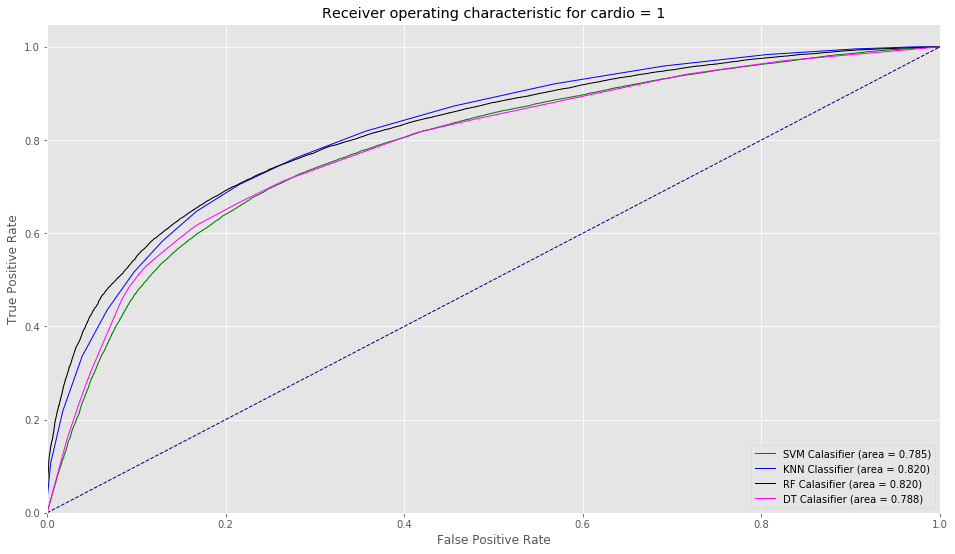

In [41]:
plt.figure(figsize=(16,9));
plt.plot(fprSVM[1], tprSVM[1], color='green', lw=1, label='SVM Calasifier (area = %0.3f)' % roc_auc_SVM[1])
plt.plot(fprKNN[1], tprKNN[1], color='blue', lw=1, label='KNN Classifier (area = %0.3f)' % roc_auc_KNN[1])
plt.plot(fprRF[1], tprRF[1], color='black', lw=1, label='RF Calasifier (area = %0.3f)' % roc_auc_RF[1])
plt.plot(fprDT[1], tprDT[1], color='magenta', lw=1, label='DT Calasifier (area = %0.3f)' % roc_auc_DT[1])
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for cardio = 1')
plt.legend(loc="lower right")
plt.show()

<a href="#top">Back to Top</a>
### 1.3 Modeling and Evaluation 5<a id="1.3_Modeling_and_Evaluation_5"></a>

Models we implemented: 

1.  **SVM**<br>
        Advantage: 
            -Can handle large number of dimensions. 
            -Many kernels to choose from. 
            -Fairly robust against overfitting. 
        Disadvantage:
            -Memory intensive and time consuming.
            -Parameterization is hard. 
        We used stochastic gradient descent(SGD) classifier to implement SVM to dramatically 
        increase the speed. 

2. **K-Nearest Neighbor**<br>
        Advantage:
            -Model does not need to be trained and incremental learning is done when new data is fed in. 
        Disadvantage:
            -Does not handle large number of dimensions.
            -Weighing of attributes needs to be done. Additional work.
            -memory intensive. 
            
3. **Random Forest** <br>
        Advantage: 
            -Robust to overfitting. 
            -Performs well with large number of features.
        Disadvantage: 
            -Learning is slow and integration to improve generated models is not possible. 
            
4. **Decision Tree** 
       Advantages:
            -Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
            -A decision tree does not require normalization of data.
            -A decision tree does not require scaling of data as well.
            -Missing values in the data also does NOT affect the process of building decision tree to any considerable extent.
            -A Decision trees model is very intuitive and easy to explain to technical teams as well as stakeholders.
      Disadvantage:
            -A small change in the data can cause a large change in the structure of the decision tree causing instability.
            -For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
            -Decision tree often involves higher time to train the model.
            -Decision tree training is relatively expensive as complexity and time taken is more.
            -Decision Tree algorithm is inadequate for applying regression and predicting continuous values.
            
            
As we have discussed in the above section, the best model we found was Random Forest Classification, with highest AUC and accuracy among 4 models tested. 

### Statistical Comparison of Classifiers:

In [42]:
from sklearn.model_selection import cross_val_score

acc_SVM = cross_val_score(classifierEstimaterSVM, X, y=Y, cv=cv)
acc_KNN = cross_val_score(classifierEstimaterKNN, X, y=Y, cv=cv)
acc_RF = cross_val_score(classifierEstimaterRF, X, y=Y, cv=cv)
acc_DT = cross_val_score(classifierEstimaterDT, X, y=Y, cv=cv)

In [43]:
t = 2.26 / np.sqrt(10)

e_SVM_KNN = (1-acc_SVM)-(1-acc_KNN)
e_SVM_RF = (1-acc_SVM)-(1-acc_RF)
e_SVM_DT = (1-acc_SVM)-(1-acc_DT)
e_KNN_RF = (1-acc_KNN)-(1-acc_RF)
e_KNN_DT = (1-acc_KNN)-(1-acc_DT)
e_RF_DT = (1-acc_RF)-(1-acc_DT)

stdtot_S_K = np.std(e_SVM_KNN)
stdtot_S_R = np.std(e_SVM_RF)
stdtot_S_D = np.std(e_SVM_DT)
stdtot_K_R = np.std(e_KNN_RF)
stdtot_K_D = np.std(e_KNN_DT)
stdtot_R_D = np.std(e_RF_DT)



dbarSK = np.mean(e_SVM_KNN)
dbarSR = np.mean(e_SVM_RF)
dbarSD = np.mean(e_SVM_DT)
dbarKR = np.mean(e_KNN_RF)
dbarKD = np.mean(e_KNN_DT)
dbarRD = np.mean(e_RF_DT)


print ('Range of SVM_KNN confidence interval:[%0.6f,%0.6f]' % (dbarSK-t*stdtot_S_K,dbarSK+t*stdtot_S_K))
print ('Range of SVM_RF confidence interval:[%0.6f,%0.6f]' % (dbarSR-t*stdtot_S_R,dbarSR+t*stdtot_S_R))
print ('Range of SVM_DT confidence interval:[%0.6f,%0.6f]' % (dbarSD-t*stdtot_S_D,dbarSD+t*stdtot_S_D))
print ('Range of KNN_RF confidence interval:[%0.6f,%0.6f]' % (dbarKR-t*stdtot_K_R,dbarKR+t*stdtot_K_R))
print ('Range of KNN_DT confidence interval:[%0.6f,%0.6f]' % (dbarKD-t*stdtot_K_D,dbarKD+t*stdtot_K_D))
print ('Range of RF_DT confidence interval:[%0.6f,%0.6f]' % (dbarRD-t*stdtot_R_D,dbarRD+t*stdtot_R_D))



Range of SVM_KNN confidence interval:[-0.008320,-0.001955]
Range of SVM_RF confidence interval:[0.006892,0.009015]
Range of SVM_DT confidence interval:[0.001279,0.004814]
Range of KNN_RF confidence interval:[0.010386,0.015796]
Range of KNN_DT confidence interval:[0.004505,0.011863]
Range of RF_DT confidence interval:[-0.006444,-0.003370]


According to above confidence interval range for each two models comparison we found none of them contain 0 so, we are 95% confident that none of those 4 models are the same.

<a href="#top">Back to Top</a>
### 1.4 Modeling and Evaluation 6<a id="1.4_Modeling_and_Evaluation_6"></a>

We have found out Random Forest classifier has the best performance on cardio in CVD dataset. Now, we proceed to find the Level of importance of each feature in this model.

Whit this process we are trying to select those features that contribute most to the outcome we are trying to predict.    

The benefits of feature selection include reduce overfitting, improving accuracy and minimizing computing time. 

* All features are scaled in the model.
* The coefficient values indicate the level of feature influence on model performance, higher value means stronger influence and importance.
* The influence values are sorted and top features with strongest influences are plotted.

In [44]:
# set the parameters of this estimator and fit the model

classifierEstimaterRF.fit(X, Y.values.ravel())

coef = classifierEstimaterRF.feature_importances_

feature_names=list(X2.columns.values)

#Creates a new dataframe with the coefficients and the features 
Top_Features = pd.DataFrame({'feature_names':feature_names, 'weights':coef})
print("The Top Feature are the following")
display(Top_Features.sort_values(by='weights', ascending=False))

The Top Feature are the following


,feature_names,weights
3,ap_hi,0.440719
4,ap_lo,0.201971
10,years,0.134796
5,cholesterol,0.091069
2,weight,0.044193
1,height,0.028131
11,BMI,0.019619
6,gluc,0.014188
9,active,0.009613
7,smoke,0.005763


Text(0.5,0,'Coefficient Magnitude\n(z-score)')

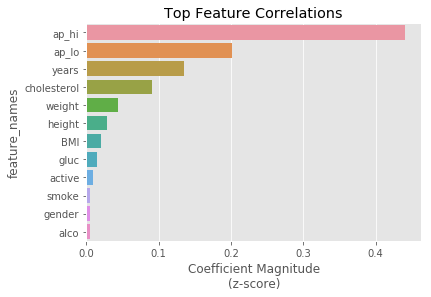

In [45]:
import seaborn as sns
ax = sns.barplot(x =Top_Features['weights'], y = Top_Features.sort_values(by='weights', ascending=False)['feature_names'], 
                 orient= 'h')
ax.set_title("Top Feature Correlations")
ax.set_xlabel("Coefficient Magnitude\n(z-score)")

Based on the coefficient shown above, it appears that ap_hi is the most important feature, followed by ap_lo, years, cholesterol, weight, height and others. 

It is obvious that Systolic blood pressure (ap_hi) holds the most weight in our prediction, followed by Diastolic blood pressure (ap_lo). These make a lot of sense as people with high blood pressure will have a bigger burden on their hearts, which would lead to cardio diseases later on. The age of a patient was the third in the prediction of cardo. This would also make sense as the older a person is the more risky of developing cardiovascular problems. We found that the data showed a person in their mid-50’s and older was more at risk. Numerous scientific reports have suggested a positive correlation between cholecsterol level, overweight and cardio diseases. Obviously, our above data supported that. On the other hand, gender, active status and glucose situation appeared to not play significant role in terms of correlating with cardio status. This is understandable. For example, glucose situation should be more related to diabetes, not cardio-disease. Since cardio disease is not caused by genetics in general, the feature of gender should not play a significant role here.  

### Finding the most influential features by Recursive Feature Elimination method

In [46]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=classifierEstimaterRF, step=1, cv=None, scoring='roc_auc')
rfecv.fit(X, Y.values.ravel())

RFECV(cv=None,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
   n_jobs=1, scoring='roc_auc', step=1, verbose=0)

Optimal number of features : 12


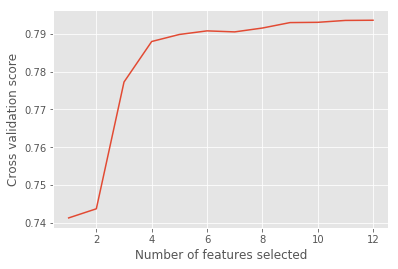

In [47]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [48]:
#find which features were eliminated
eliminated_fea1 =[]
for i in range(len(rfecv.ranking_)):
    if rfecv.support_[i] == False:
        eliminated_fea1.append(features[i])
    
    i+1
    
print("Eliminated features:", eliminated_fea1)

Eliminated features: []


In [49]:
#Plot the RFE Rankings
plt.style.use('ggplot')

rfe_ft_imp_df = pd.DataFrame({'feature_names':X2.columns.values, 'weights':rfecv.grid_scores_})
rfe_ft_imp_df.sort_values(by='weights', inplace=True, ascending=False )

features = rfe_ft_imp_df

features

,feature_names,weights
11,BMI,0.793658
10,years,0.793609
9,active,0.793106
8,alco,0.793037
7,smoke,0.791591
5,cholesterol,0.790839
6,gluc,0.790569
4,ap_lo,0.789885
3,ap_hi,0.788021
2,weight,0.777274


Results from the Recursive Feature Elimination method suggest that all features are important and none should be deleted.

<a href="#top">Back to Top</a>
# Task 2<a id="Task_1"></a>

### 2.1 Modeling and Evaluation 3<a id="2.1_Modeling_and_Evaluation_3"></a>

Now we are using 3 different classifiers to predict if patient cholesterol is in normal level or above. As we mentioned previously there is imbalanced distribution in cholesterol classes and we can not use regular cross validation methods. We decided to combine 2 above normal classes together (as not normal cholesterol level, '0') and use SMOTE technique to generate new samples for minor class in order to solve imbalanced situation. This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. In addition to SMOTE, there is another technique to deal with imbalanced distribution which called NearMiss. NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to minority class. For this task we used accuracy as a metric to evaluate 3 different models which are KNN , Random Forest and Logistic Regression.

In [50]:
# combining 2 above normal classes
#change gender levels: normal = 0  and not-normal = 1
df['cholesterol'] = df['cholesterol'].apply(lambda x:1 if x == 2 or x == 3 else(0))
#cholesterol percentage split
(df['cholesterol'].value_counts()/len(df))*100

0    75.754183
1    24.245817
Name: cholesterol, dtype: float64

In [51]:
#separating input data into two parts X (features) and Y (target)
features1 = ["gender", "height", "weight", "ap_hi", "ap_lo","cardio", "gluc", "smoke", "alco", "active", "years", "BMI"]

X1 = df[features1].copy()

Y1= df[['cholesterol']].copy()
Y2 = Y1.values

scaler.fit(X1)

#This makes our model's coefficients take on the same scale for accurate feature importance analysis
#Notice we scaled the data before the cross validation
X_Scl = scaler.transform(X1)


In [52]:
# train and test split before resampling
X1_train, X1_test, y1_train, y1_test = train_test_split(X_Scl, Y1, test_size = 0.2, random_state = 101) 

print("Before OverSampling, counts of label '1': {}".format(sum(y1_train['cholesterol'] == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y1_train['cholesterol'] == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X1_train_res, y1_train_res = sm.fit_sample(X1_train, y1_train.values.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X1_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y1_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y1_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y1_train_res == 0))) 


Before OverSampling, counts of label '1': 11761
Before OverSampling, counts of label '0': 36821 

After OverSampling, the shape of train_X: (73642, 12)
After OverSampling, the shape of train_y: (73642,) 

After OverSampling, counts of label '1': 36821
After OverSampling, counts of label '0': 36821


#### Model 1: KNN Classification

In [54]:

param_grid = [
    {
         'weights': ['uniform','distance'],
         'leaf_size': [5,10],
         'metric': ['minkowski','euclidean'],
         'n_neighbors':[2,3,5],
         
    }
]


grid_search_KNN = GridSearchCV(clf_KNN, param_grid=param_grid,cv=cv,n_jobs=-1, verbose=1, scoring='accuracy' )

KNearest_model1 = grid_search_KNN.fit(X1_train_res, y1_train_res)

y_KNN_score1 = grid_search_KNN.predict(X1_test)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 17.9min finished


In [55]:
classifierEstimaterKNN1 = KNearest_model1.best_estimator_
classifierEstimaterKNN1

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='distance')

In [56]:
KNearest_scores1 = EvaluateClassifierEstimator(classifierEstimaterKNN1, X1_train_res, y1_train_res,cv=10)

The average accuracy for all cv folds is: 			 0.83298
The average precision for all cv folds is: 			 0.79166
The average Recall for all cv folds is: 			 0.90359
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0  0.821070   0.792481  0.869943
1  0.800380   0.770813  0.854970
2  0.813009   0.778853  0.874253
3  0.829712   0.787814  0.902499
4  0.837996   0.790161  0.920424
5  0.846143   0.798408  0.926127
6  0.846143   0.800236  0.922596
7  0.842205   0.798437  0.915535
8  0.843156   0.795279  0.924226
9  0.849946   0.804107  0.925312


In [61]:
EvaluateClassifierEstimator3(classifierEstimaterKNN1, X_Scl, Y2, cv)

====Iteration 0  ====
accuracy 0.7255515311162332
confusion matrix
 [[3817  784]
 [ 883  590]]
====Iteration 1  ====
accuracy 0.7188014487981561
confusion matrix
 [[3777  824]
 [ 884  589]]
====Iteration 2  ====
accuracy 0.7174843595653606
confusion matrix
 [[3795  806]
 [ 910  563]]
====Iteration 3  ====
accuracy 0.7311491603556141
confusion matrix
 [[3834  767]
 [ 866  607]]
====Iteration 4  ====
accuracy 0.7203557312252964
confusion matrix
 [[3760  840]
 [ 858  614]]
====Iteration 5  ====
accuracy 0.7229907773386034
confusion matrix
 [[3799  801]
 [ 881  591]]
====Iteration 6  ====
accuracy 0.7211791831357048
confusion matrix
 [[3798  802]
 [ 891  581]]
====Iteration 7  ====
accuracy 0.7201910408432147
confusion matrix
 [[3777  823]
 [ 876  596]]
====Iteration 8  ====
accuracy 0.7144268774703557
confusion matrix
 [[3765  835]
 [ 899  573]]
====Iteration 9  ====
accuracy 0.7149209486166008
confusion matrix
 [[3779  821]
 [ 910  562]]


In [63]:
from sklearn.model_selection import cross_val_score
KNN_accuracy = cross_val_score(classifierEstimaterKNN1, X_Scl, y=Y2, cv=cv)
KNN_acc=KNN_accuracy.mean()
KNN_acc

0.7207051058465139

#### Model #2 Random Forest Classification

In [65]:
param_grid = [
    {
         'n_estimators': [200, 500], 
         'max_depth': [20,30,35],
         'random_state':[101]
     }
]

grid_search_RF = GridSearchCV(clf_RF, param_grid=param_grid, cv=cv,n_jobs=-1, verbose=1, scoring='accuracy' )

RandomForest_model1 = grid_search_RF.fit(X1_train_res, y1_train_res)

y_RF_score1 = grid_search_RF.predict(X1_test)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  9.6min finished


In [66]:
classifierEstimaterRF1 = RandomForest_model1.best_estimator_
classifierEstimaterRF1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=35, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [67]:
EvaluateClassifierEstimator3(classifierEstimaterRF1, X_Scl, Y2, cv)

====Iteration 0  ====
accuracy 0.786466908133026
confusion matrix
 [[4226  375]
 [ 922  551]]
====Iteration 1  ====
accuracy 0.7820217319723411
confusion matrix
 [[4191  410]
 [ 914  559]]
====Iteration 2  ====
accuracy 0.7749423773460652
confusion matrix
 [[4171  430]
 [ 937  536]]
====Iteration 3  ====
accuracy 0.7846559104379321
confusion matrix
 [[4236  365]
 [ 943  530]]
====Iteration 4  ====
accuracy 0.7816205533596838
confusion matrix
 [[4185  415]
 [ 911  561]]
====Iteration 5  ====
accuracy 0.7784914361001317
confusion matrix
 [[4198  402]
 [ 943  529]]
====Iteration 6  ====
accuracy 0.7747035573122529
confusion matrix
 [[4182  418]
 [ 950  522]]
====Iteration 7  ====
accuracy 0.7789855072463768
confusion matrix
 [[4187  413]
 [ 929  543]]
====Iteration 8  ====
accuracy 0.7770092226613966
confusion matrix
 [[4195  405]
 [ 949  523]]
====Iteration 9  ====
accuracy 0.7835968379446641
confusion matrix
 [[4222  378]
 [ 936  536]]


In [68]:
RF_accuracy = cross_val_score(classifierEstimaterRF1, X_Scl, y=Y2, cv=cv)
RF_acc=RF_accuracy.mean()
RF_acc

0.7802494042513871

#### Model #3 Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

parameters = { 'penalty':['l2']
              ,'C': [0.1, 1, 10, 100]
              ,'class_weight': ['balanced','none']
              ,'solver': ['lbfgs']
              ,'max_iter':[1500,2000]
              ,'random_state':[101]
             }

clf_LR = LogisticRegression()
grid_search_LR = GridSearchCV(clf_LR, param_grid=parameters, cv=cv,n_jobs=-1, verbose=1, scoring='accuracy' )

LogisticRegression_model = grid_search_LR.fit(X1_train_res, y1_train_res)

y_LR_score = grid_search_LR.predict(X1_test)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    8.6s finished


In [70]:
classifierEstimaterLR = LogisticRegression_model.best_estimator_
classifierEstimaterLR

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1500,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=101,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [71]:
EvaluateClassifierEstimator3(classifierEstimaterLR, X_Scl, Y2, cv)

====Iteration 0  ====
accuracy 0.7332894303589068
confusion matrix
 [[3516 1085]
 [ 535  938]]
====Iteration 1  ====
accuracy 0.7313137965097135
confusion matrix
 [[3486 1115]
 [ 517  956]]
====Iteration 2  ====
accuracy 0.7186368126440567
confusion matrix
 [[3436 1165]
 [ 544  929]]
====Iteration 3  ====
accuracy 0.7351004280540007
confusion matrix
 [[3507 1094]
 [ 515  958]]
====Iteration 4  ====
accuracy 0.7241436100131752
confusion matrix
 [[3444 1156]
 [ 519  953]]
====Iteration 5  ====
accuracy 0.7299077733860343
confusion matrix
 [[3491 1109]
 [ 531  941]]
====Iteration 6  ====
accuracy 0.724308300395257
confusion matrix
 [[3478 1122]
 [ 552  920]]
====Iteration 7  ====
accuracy 0.7254611330698287
confusion matrix
 [[3446 1154]
 [ 513  959]]
====Iteration 8  ====
accuracy 0.7295783926218709
confusion matrix
 [[3483 1117]
 [ 525  947]]
====Iteration 9  ====
accuracy 0.7188735177865613
confusion matrix
 [[3422 1178]
 [ 529  943]]


In [72]:
LR_accuracy = cross_val_score(classifierEstimaterLR, X_Scl, y=Y2, cv=cv)
LR_acc=LR_accuracy.mean()
LR_acc

0.7270613194839405

<a href="#top">Back to Top</a>
### 2.2 Modeling and Evaluation 4<a id="2.2_Modeling_and_Evaluation_4"></a>

The best model we found was Random Forest Classification, with a accuracy score of ~.78

In [73]:
print ('accuracy for KNN classifier is :',KNN_acc)
print ('accuracy for Random Forest classifier is :',RF_acc)
print ('accuracy for Logistic Regression classifier is :',LR_acc)

accuracy for KNN classifier is : 0.7207051058465139
accuracy for Random Forest classifier is : 0.7802494042513871
accuracy for Logistic Regression classifier is : 0.7270613194839405


<a href="#top">Back to Top</a>
### 2.3 Modeling and Evaluation 5<a id="2.3_Modeling_and_Evaluation_5"></a>
* Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

# Statistical Comparison of Classifiers: 

In [74]:
t = 2.26 / np.sqrt(10)

e_KNN_LR = (1-KNN_accuracy)-(1-LR_accuracy)
e_KNN_RF = (1-KNN_accuracy)-(1-RF_accuracy)
e_RF_LR = (1-RF_accuracy)-(1-LR_accuracy)


stdtot_K_L = np.std(e_KNN_LR)
stdtot_K_R = np.std(e_KNN_RF)
stdtot_R_L = np.std(e_RF_LR)



dbarKL = np.mean(e_KNN_LR)
dbarKR = np.mean(e_KNN_RF)
dbarRL = np.mean(e_RF_LR)



print ('Range of KNN_LR confidence interval:[%0.6f,%0.6f]' % (dbarKL-t*stdtot_K_L,dbarKL+t*stdtot_K_L))
print ('Range of KNN_RF confidence interval:[%0.6f,%0.6f]' % (dbarKR-t*stdtot_K_R,dbarKR+t*stdtot_K_R))
print ('Range of RF_LR confidence interval:[%0.6f,%0.6f]' % (dbarRL-t*stdtot_R_L,dbarRL+t*stdtot_R_L))


Range of KNN_LR confidence interval:[0.003372,0.009340]
Range of KNN_RF confidence interval:[0.056309,0.062780]
Range of RF_LR confidence interval:[-0.056709,-0.049667]


None of above confidence intervals contain 0 so we are 95% confident that those three models are not the same.

<a href="#top">Back to Top</a>
### 2.4 Modeling and Evaluation 6<a id="2.4_Modeling_and_Evaluation_6"></a>
* Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

We found out Random Forest classifier has the best performance on cholesterol in CVD dataset. Now, we proceed to find the Level of importance of each feature in this model.

In [75]:
# set the parameters of this estimator and fit the model
classifierEstimaterRF1.fit(X_Scl, Y1.values.ravel())

coef = classifierEstimaterRF1.feature_importances_

feature_names=list(X1.columns.values)

#Creates a new dataframe with the coefficients and the features 
Top_Features = pd.DataFrame({'feature_names':feature_names, 'weights':coef})
print("The Top Feature are the following")
display(Top_Features.sort_values(by='weights', ascending=False))

The Top Feature are the following


,feature_names,weights
2,weight,0.216062
1,height,0.193159
10,years,0.181606
6,gluc,0.145707
3,ap_hi,0.092742
4,ap_lo,0.060030
5,cardio,0.025171
9,active,0.022540
11,BMI,0.021819
0,gender,0.017824


Text(0.5,0,'Coefficient Magnitude\n(z-score)')

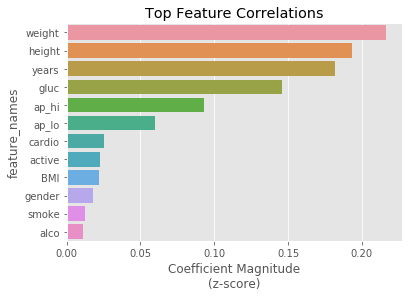

In [76]:
import seaborn as sns
ax = sns.barplot(x =Top_Features['weights'], y = Top_Features.sort_values(by='weights', ascending=False)['feature_names'], 
                 orient= 'h')
ax.set_title("Top Feature Correlations")
ax.set_xlabel("Coefficient Magnitude\n(z-score)")

In [77]:
rfecv1 = RFECV(estimator=classifierEstimaterRF1, step=1, cv=None, scoring='accuracy')
rfecv1.fit(X_Scl, Y1.values.ravel())

RFECV(cv=None,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=35, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

Optimal number of features : 12


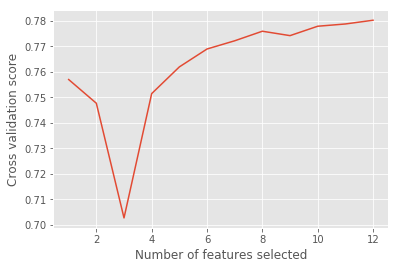

In [78]:
# Examine categorical variables of interest  

print("Optimal number of features : %d" % rfecv1.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv1.grid_scores_) + 1), rfecv1.grid_scores_)
plt.show()

<a href="#top">Back to Top</a>
### Deployment<a id="Deployment"></a>
* How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would you deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?

<a href="#top">Back to Top</a>
### Exceptional Work<a id="Exceptional_Work"></a>
* You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

We will be looking at a Voting Classifier. Voting is one of the easyest ways of combining the predictions from multiple machine learning algorithms. Voting classifier isn’t an actual classifier but it wraps up different ones that are trained and valuated in parallel in order to look at the different uniqueness of each system. We will use and ensemble of different algorithms then predict the final output.

This output on a prediction is taken by a vote according to two different strategies:

* Hard voting / Majority voting: Hard voting is the simplest case of majority voting. In this case, the class that received the highest number of votes will be chosen.
Or
* Soft Voting / Average probability: The probability vector for each predicted class is summed and the average is collected. The winning class is the one with the highest value.

We will use both hard and soft voting .

### Hard Voting

In [80]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

# Training classifiers

clf1 = classifierEstimaterSVM

clf2 = classifierEstimaterKNN

clf3 = classifierEstimaterRF

clf4 = classifierEstimaterDT

eclf = VotingClassifier(estimators=[('SVM', clf1), ('KNN', clf2),
                                    ('RF', clf3),('DT',clf4)],voting='hard',)

labels = ['SVM', 'KNN (k=17)', 'Random Forest (depth=10)','Decision Tree (depth=5)','Ensemble']

for clf, label in zip([clf1, clf2, clf3,clf4,eclf], labels):

    scores = model_selection.cross_val_score(clf, X, Y, 
                                              cv=StratifiedKFold(n_splits=10, random_state=101), 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.72 (+/- 0.00) [SVM]
Accuracy: 0.72 (+/- 0.00) [KNN (k=17)]
Accuracy: 0.73 (+/- 0.00) [Random Forest (depth=10)]
Accuracy: 0.72 (+/- 0.00) [Decision Tree (depth=5)]
Accuracy: 0.73 (+/- 0.00) [Ensemble]


### Soft Voting

In [94]:
clf1_1 = SGDClassifier(alpha=0.01, average=False, class_weight='balanced', epsilon=0.1,
                       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
                       learning_rate='optimal', loss='modified_huber', max_iter=1000,
                       n_iter=None, n_jobs=1, penalty='l2', power_t=0.5, random_state=101,
                       shuffle=True, tol=None, verbose=0, warm_start=False)

eclf_soft = VotingClassifier(estimators=[('SVM', clf1_1), ('KNN', clf2),
                                    ('RF', clf3),('DT',clf4)],voting='soft',)

labels = ['SVM', 'KNN (k=17)', 'Random Forest (depth=10)','Decision Tree (depth=5)','Ensemble']

for clf, label in zip([clf1, clf2, clf3,clf4,eclf], labels):

    scores = model_selection.cross_val_score(clf, X, Y, 
                                              cv=StratifiedKFold(n_splits=10, random_state=101), 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.72 (+/- 0.00) [SVM]
Accuracy: 0.72 (+/- 0.00) [KNN (k=17)]
Accuracy: 0.73 (+/- 0.00) [Random Forest (depth=10)]
Accuracy: 0.72 (+/- 0.00) [Decision Tree (depth=5)]
Accuracy: 0.73 (+/- 0.00) [Ensemble]


After reviewing both Hard and Soft voting we found that neither type produced better results than we already had.